<a href="https://colab.research.google.com/github/LeeHuiJong/SkillTreePython-DataAnalysis/blob/main/ch02_09_Seaborn%EC%8B%A4%EC%8A%B5_tip%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.09. Seborn 실습 - tip 데이터


---

* 날짜:
* 이름:


## 학습내용

    - Catplot을 이용해 범주별 데이터의 분포를 시각화 한다.
    - Catplot의 다양한 시각화 종류를 알아본다.

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')
```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')


## **실습**
---



### (1) 데이터 기본 탐색

#### | 데이터 준비

```
tips = sns.load_dataset('tips')
tips.head()
```

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### | 데이터 기본 탐색


In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
tips.day.unique

<bound method Series.unique of 0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']>

In [5]:
tips.isnull().sum() # 결측치 없음

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


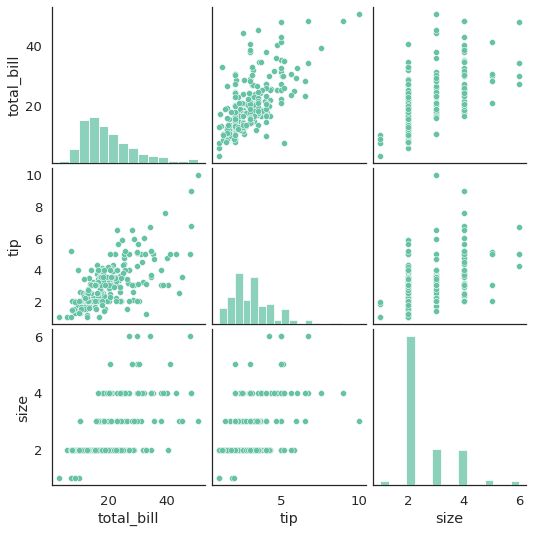

In [7]:
sns.pairplot(tips)

### (2) Categorical plot

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

```
seaborn.catplot(x=None, y=None, 
                hue=None, data=None,
                kind = 'strip' # {swarm, box, violin, boxen, point, bar, count} 
                row=None, col=None, 
                col_wrap=None, 
                units=None, seed=None, order=None,
                hue_order=None, row_order=None, 
                col_order=None, height=5, 
                aspect=1, orient=None, color=None, 
                palette=None, legend=True, 
                legend_out=True, 
                sharex=True, sharey=True, 
                margin_titles=False,
                facet_kws=None,
                jitter=True)

```

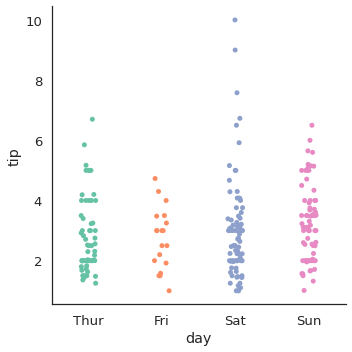

In [8]:
sns.catplot(data = tips, x='day', y='tip') # 날짜별 팁의 분포 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


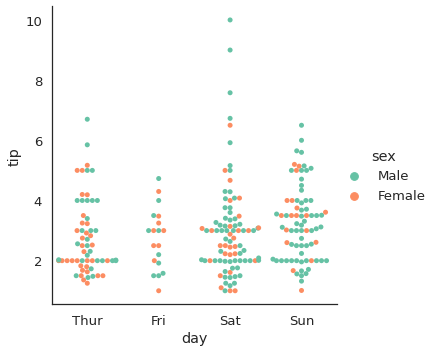

In [10]:
sns.catplot(data = tips, x='day', y='tip', # 날짜별 팁의 분포
            kind = 'swarm', # 디폴트가 strip
            hue = 'sex', # 성별로 데이터 따로 그리기
            )

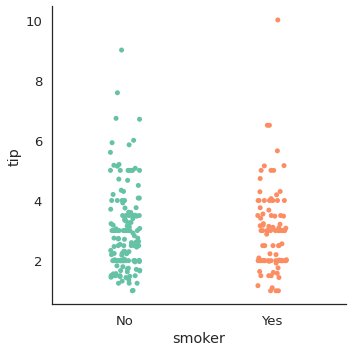

In [14]:
# 흡연 여부에 따라 팁의 분포 그리기
sns.catplot(data= tips, x= 'smoker', y= 'tip',
            order = ['No', 'Yes'] # x 카테고리의 순서. 입력이 틀리면 데이터가 안나온다. 정확한 카테고리를 입력해야함.
            )

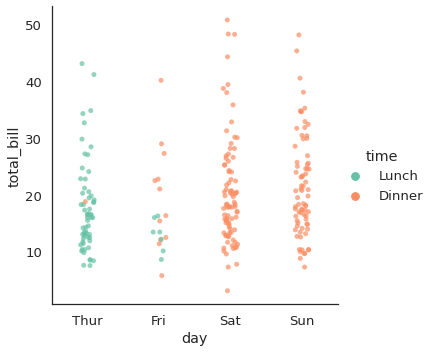

In [18]:
# 요일 별로 total_bill 그리기 -> 시간도 구분하기
sns.catplot(data= tips, x= 'day', y= 'total_bill',
            hue = 'time',
            alpha = 0.7)

#### | 플롯 분할



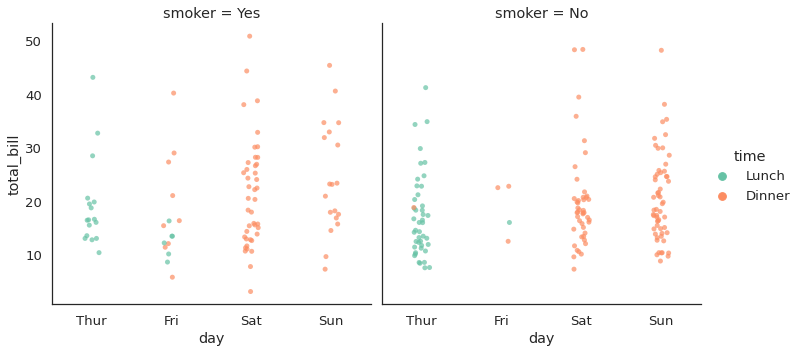

In [20]:
sns.catplot(data= tips, x= 'day', y= 'total_bill',
            hue = 'time',
            col = 'smoker',
            alpha = 0.7)

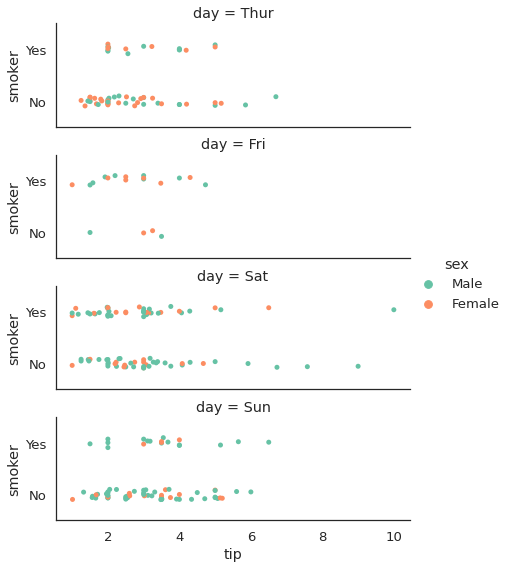

In [28]:
# 수평 플롯(x = tip, y = 흡연여부)
sns.catplot(data= tips, x= 'tip', y= 'smoker',
            row = 'day', # 행으로 분리
            height=2 , aspect= 3, # 사이즈 조절
            hue='sex') # 성별로 다르게 표시
            

### (3) 범주별 통계 시각화



#### | Bar plots


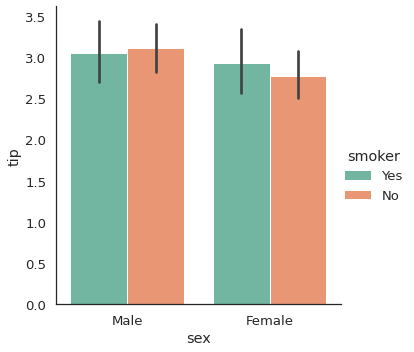

In [29]:
sns.catplot(data= tips, x='sex', y='tip',
            kind = 'bar', # 종류를 막대그래프로
            hue = 'smoker', # 흡연여부로 구분
            )

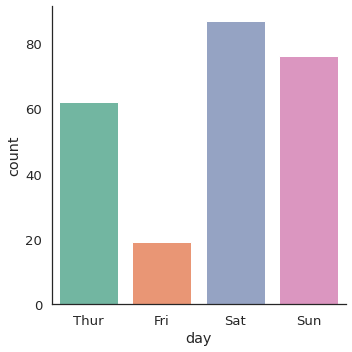

In [31]:
sns.catplot(data= tips, x='day', # 날짜별 카운팅
            kind = 'count', 
            )

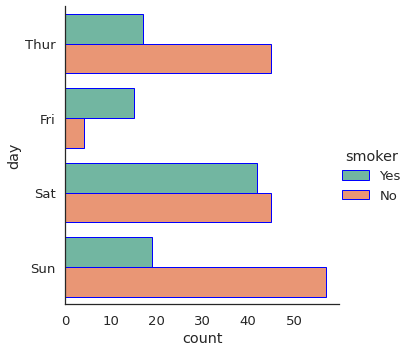

In [35]:
sns.catplot(data= tips, y='day', # 날짜별 수평플롯
            kind = 'count',
            hue ='smoker', # 흡연여부 구분 
            edgecolor='b'
            )

#### | Point plots



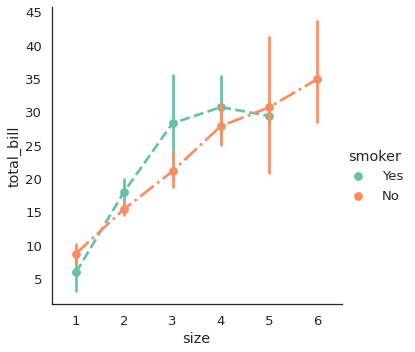

In [40]:
sns.catplot(data= tips, x='size', y='total_bill',
            hue='smoker',
            kind = 'point', # 포인트 플롯 
            linestyles = ['--','-.'], # 라인 모양
            marker = ['d','^'], # 마커 모양
            )

### (4) 범주별 분포 시각화


#### | Box plots


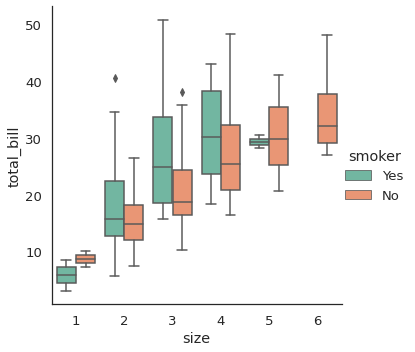

In [42]:
sns.catplot(data= tips, x='size', y='total_bill',
            hue='smoker',
            kind = 'box', # 박스 플롯
            )

#### | Violin plots

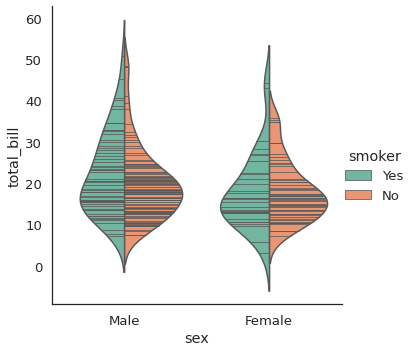

In [47]:
sns.catplot(data= tips, x='sex', y='total_bill',
            hue='smoker',
            kind = 'violin', # 바이올린 플롯
            inner = 'stick', # 그래프 안에 선을 그려줌
            split=True, # split 을 True 면 합쳐짐
            )

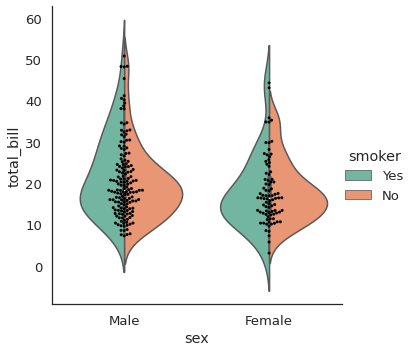

In [51]:
g=sns.catplot(data= tips, x='sex', y='total_bill',
           hue='smoker',
            kind = 'violin', # 바이올린 플롯
            split=True, # split 을 True 면 합쳐짐
            )
sns.swarmplot(data = tips, x = 'sex', y= 'total_bill', ax=g.ax,
              color = 'k',
              size = 3)


## **과제: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/notebook)**

---

![](https://storage.googleapis.com/kaggle-media/welcome/video_thumbnail.jpg)



### (1) 데이터 기본 탐색


#### | 데이터 준비

```
df = sns.load_dataset('titanic')
df.head()
```

In [71]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### | 데이터 기본 탐색


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [86]:
df.isnull().sum() # 결측치 age, deck,embarked ,embark_town 에 있다

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [89]:
df = df.dropna() # 결측치를 모두 지웠음.
df.isnull().sum()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


### (2) Categorical plot


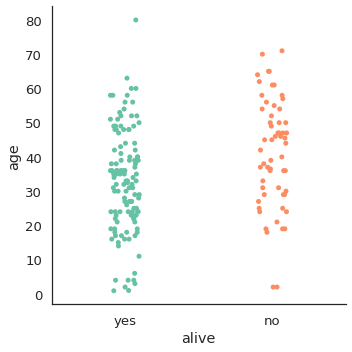

In [110]:
sns.catplot(data=df, x='alive', y='age') 

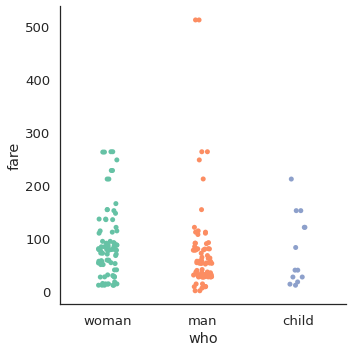

In [104]:
sns.catplot(data=df, x='who', y='fare')

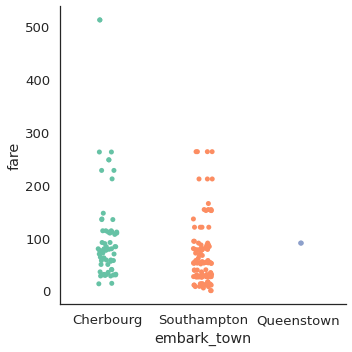

In [63]:
sns.catplot(data=df, x='embark_town', y='fare') # Queenstaown이 승선항구인 사람들은 거의 없다.

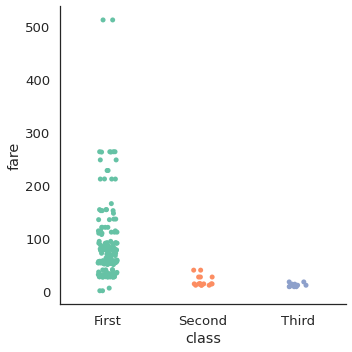

In [64]:
sns.catplot(data=df, x='class', y='fare') # first 클래스에 탄 사람들이 낸 요금이 두드러지게 높다.

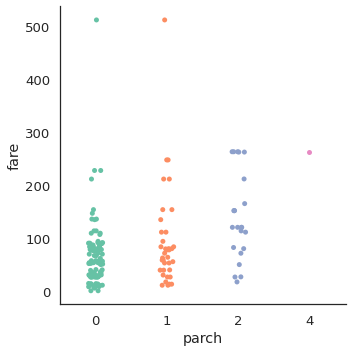

In [90]:
sns.catplot(data=df, x='parch', y='fare') # 부모 자식과 함께 탑승하지 않은 사람들도 많이 있다.

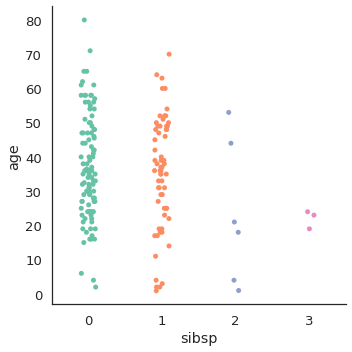

In [92]:
sns.catplot(data=df, x='sibsp', y='age') # 형제 자매 배우자와 같이오지 않은 사람들도 많다.

#### | 플롯 분할


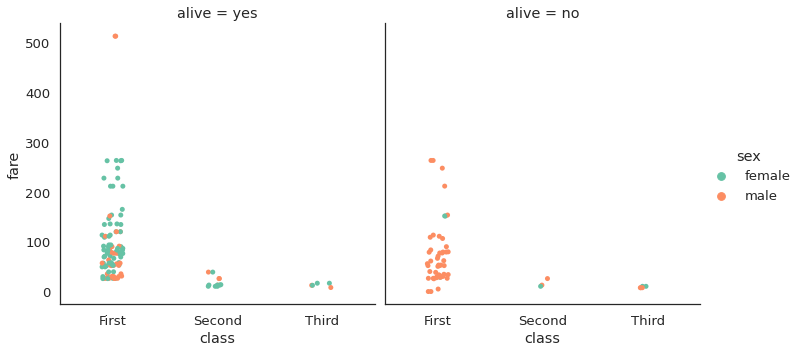

In [65]:
sns.catplot(data=df, x='class', y='fare',
            hue='sex',
            col='alive') # 생존 여부를 중심으로 플롯을 분할
                         # 타이타닉 사건때 여자가 많이 살아 남은것이 보인다.
                         # 특히 first 클래스에 탔던 사람들이 많이 살아남았다.

### (3) 범주별 통계 시각화


#### | Bar plots

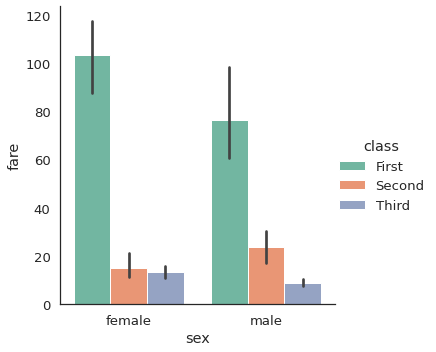

In [69]:
sns.catplot(data= df, x='sex', y='fare',
            kind = 'bar', # 그래프이 종류를 bar 로 설정
            hue = 'class', 
            )

#### | Point plots



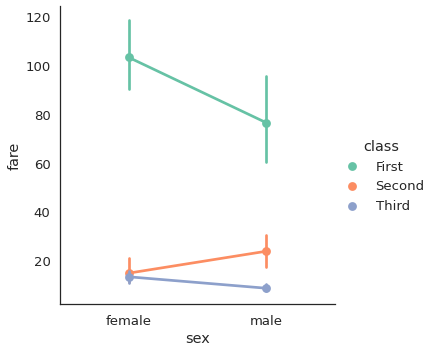

In [70]:
sns.catplot(data= df, x='sex', y='fare',
            kind = 'point', # 그래프이 종류를 point 로 설정
            hue = 'class', 
            )

### (4) 범주별 분포 시각화


#### | Box plots


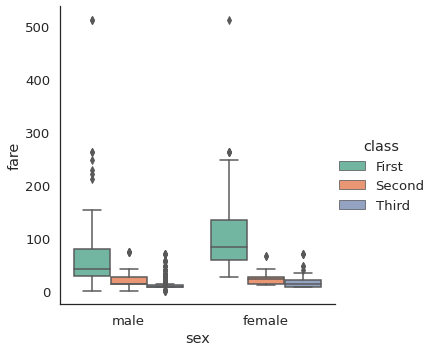

In [73]:
sns.catplot(data= df, x='sex', y='fare',
            hue='class',
            kind = 'box', # 박스 플롯
            )  # first 클래스의 사람들이 상당히 많은 비용을 낸것을 볼 수 있다. 이상값도 first 클래스가 높이 위치해있다.

#### | Violin plots

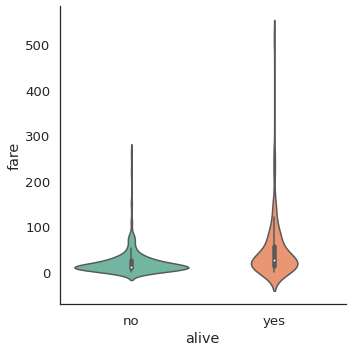

In [83]:
sns.catplot(data= df, x='alive', y='fare',
            kind = 'violin',
            )